In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

In [4]:
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


### Pred1 is always the log odds 

In [16]:
df['pred1'] = np.log(5/3)

In [17]:
df

,cgpa,iq,is_placed,pred1
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [18]:
def probability(pred):
    return 1/(1+np.exp(-pred))

In [19]:
df['pred1(P)'] = df['pred1'].apply(probability)

In [20]:
df

,cgpa,iq,is_placed,pred1,pred1(P)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [23]:
df['res1'] = df['is_placed'] - df['pred1(P)']
df

,cgpa,iq,is_placed,pred1,pred1(P),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [32]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_depth=1)

In [33]:
dt1.fit(df.iloc[:,0:2],df.iloc[:,-1])

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.625, 0.5, '  False')]

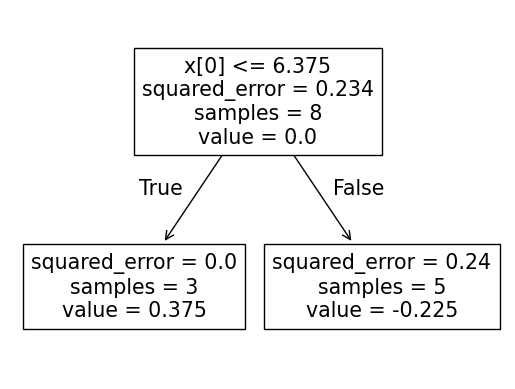

In [34]:
from sklearn.tree import plot_tree

plot_tree(dt1)

In [38]:
df['nodesLoc1'] = dt1.apply(df.iloc[:,0:2])

In [39]:
df

,cgpa,iq,is_placed,pred1,pred1(P),res1,nodesLoc1
0,6.82,118,0,0.510826,0.625,-0.625,2
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,2
5,9.13,148,1,0.510826,0.625,0.375,2
6,7.17,147,1,0.510826,0.625,0.375,2
7,7.72,72,0,0.510826,0.625,-0.625,2


In [46]:
node2 = df[df['nodesLoc1'] == 2]['res1'].sum() / (0.625*(1-0.625)*5)

In [47]:
node1 = df[df['nodesLoc1'] == 1]['res1'].sum() / (0.625*(1-0.625)*3)

In [50]:
df['nodeValue'] = df['nodesLoc1'].apply(lambda x: node1 if x == 1 else node2)

In [51]:
df

,cgpa,iq,is_placed,pred1,pred1(P),res1,nodesLoc1,nodeValue
0,6.82,118,0,0.510826,0.625,-0.625,2,-0.96
1,6.36,125,1,0.510826,0.625,0.375,1,1.60
2,5.39,99,1,0.510826,0.625,0.375,1,1.60
3,5.50,106,1,0.510826,0.625,0.375,1,1.60
4,6.39,148,0,0.510826,0.625,-0.625,2,-0.96
5,9.13,148,1,0.510826,0.625,0.375,2,-0.96
6,7.17,147,1,0.510826,0.625,0.375,2,-0.96
7,7.72,72,0,0.510826,0.625,-0.625,2,-0.96


In [52]:
df['pred2'] = df['pred1'] + df['nodeValue']

In [53]:
df

,cgpa,iq,is_placed,pred1,pred1(P),res1,nodesLoc1,nodeValue,pred2
0,6.82,118,0,0.510826,0.625,-0.625,2,-0.96,-0.449174
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,2,-0.96,-0.449174
5,9.13,148,1,0.510826,0.625,0.375,2,-0.96,-0.449174
6,7.17,147,1,0.510826,0.625,0.375,2,-0.96,-0.449174
7,7.72,72,0,0.510826,0.625,-0.625,2,-0.96,-0.449174


In [56]:
df['pred2(P)'] = df['pred2'].apply(probability)

In [57]:
df

,cgpa,iq,is_placed,pred1,pred1(P),res1,nodesLoc1,nodeValue,pred2,pred2(P)
0,6.82,118,0,0.510826,0.625,-0.625,2,-0.96,-0.449174,0.389557
1,6.36,125,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,1.60,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,2,-0.96,-0.449174,0.389557
5,9.13,148,1,0.510826,0.625,0.375,2,-0.96,-0.449174,0.389557
6,7.17,147,1,0.510826,0.625,0.375,2,-0.96,-0.449174,0.389557
7,7.72,72,0,0.510826,0.625,-0.625,2,-0.96,-0.449174,0.389557


### In this way we add the models and improve the performance